# WEEK 3 -  HOMEWORK PROJECT DATASET PREPROCESSING AND FEATURE ENGINEERING

In [2]:
# Importing necessary libraries
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [6]:
# Load datasets
transactions_file = "DMP - FM - Transaction_Data.csv"
products_file = "DMP - FM - Product_Offering_Data.csv"
customers_file = "DMP - FM - Customer_Feedback_Data.csv"
transactions_data = pd.read_csv(transactions_file)
products_data = pd.read_csv(products_file)
customers_data = pd.read_csv(customers_file)

# Datasets Preprocessesing

In [8]:
transactions_data.head()

,Transaction_ID,Customer_ID,Transaction_Date,Transaction_Amount,Transaction_Type
0,1,393,2023-01-01 00:00:00,3472.0,Purchase
1,2,826,2023-01-01 01:00:00,NaN,Bill Payment
2,3,916,2023-01-01 02:00:00,10.0,Purchase
3,4,109,2023-01-01 03:00:00,72.0,Investment
4,5,889,2023-01-01 04:00:00,1793.0,Investment


In [10]:
products_data.head()

,Product_ID,Product_Name,Product_Type,Risk_Level,Target_Age_Group,Target_Income_Group
0,1,Platinum Credit Card,Credit Card,Medium,NaN,Medium
1,2,Gold Savings Account,Savings Account,Low,NaN,Low
2,3,High-Yield Investment Account,Investment,High,NaN,High
3,4,Mortgage Loan,Loan,Medium,NaN,High
4,5,Auto Loan,Loan,Medium,NaN,Medium


In [12]:
customers_data.head()

,Customer_ID,Satisfaction_Score,Feedback_Comments,Likelihood_to_Recommend
0,1,10.0,Very satisfied,9
1,2,3.0,Very satisfied,3
2,3,10.0,Very satisfied,1
3,4,7.0,Needs improvement,4
4,5,8.0,Unsatisfactory,7


## Transactions Data Preprocessing

In [16]:
# 1. Inspect the data
print("First few rows of the data:")
print(transactions_data.head())

print("\nSummary of the data:")
print(transactions_data.info())

First few rows of the data:
   Transaction_ID  Customer_ID     Transaction_Date  Transaction_Amount  \
0               1          393  2023-01-01 00:00:00              3472.0   
1               2          826  2023-01-01 01:00:00                 NaN   
2               3          916  2023-01-01 02:00:00                10.0   
3               4          109  2023-01-01 03:00:00                72.0   
4               5          889  2023-01-01 04:00:00              1793.0   

  Transaction_Type  
0         Purchase  
1     Bill Payment  
2         Purchase  
3       Investment  
4       Investment  

Summary of the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction_ID      5050 non-null   int64  
 1   Customer_ID         5050 non-null   int64  
 2   Transaction_Date    5050 non-null   object 
 3   Transaction_Amoun

In [18]:
# 2. Check for duplicates
print("\nNumber of duplicate rows:", transactions_data.duplicated().sum())
transactions_data = transactions_data.drop_duplicates()
print("Duplicates removed.")


Number of duplicate rows: 50
Duplicates removed.


In [20]:
# 3. Check for missing values
print("\nMissing values in each column:")
print(transactions_data.isnull().sum())


Missing values in each column:
Transaction_ID          0
Customer_ID             0
Transaction_Date        0
Transaction_Amount    100
Transaction_Type        0
dtype: int64


In [22]:
# Handle missing values for transactions_data
# For Transaction_Amount, we will fill missing values with the mean of the Transaction_Type group
transactions_data['Transaction_Amount'] = transactions_data.groupby('Transaction_Type')['Transaction_Amount'].transform(lambda x: x.fillna(x.mean()))

In [24]:
# 4. Check and fix data types if necessary
print("\nColumn data types before fixing:")
print(transactions_data.dtypes)


Column data types before fixing:
Transaction_ID          int64
Customer_ID             int64
Transaction_Date       object
Transaction_Amount    float64
Transaction_Type       object
dtype: object


In [28]:
# 5. Check for outliers (example: Amount column)
print("\nDescribe the numeric columns:")
print(transactions_data.describe())


Describe the numeric columns:
       Transaction_ID  Customer_ID  Transaction_Amount
count     5000.000000  5000.000000         5000.000000
mean      2500.500000   505.295400         3103.231136
std       1443.520003   291.844284        14743.580770
min          1.000000     1.000000           10.000000
25%       1250.750000   252.000000         1260.000000
50%       2500.500000   509.000000         2539.000000
75%       3750.250000   765.250000         3724.000000
max       5000.000000  1000.000000       480300.000000


In [38]:
# Remove extreme outliers in the 'Amount' column
transactions_data = transactions_data[transactions_data['Transaction_Amount'] < transactions_data['Transaction_Amount'].quantile(0.99)]

In [40]:
# 6. Verify the cleaned data
print("\nSummary of cleaned data:")
print(transactions_data.info())


Summary of cleaned data:
<class 'pandas.core.frame.DataFrame'>
Index: 4950 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Transaction_ID      4950 non-null   int64         
 1   Customer_ID         4950 non-null   int64         
 2   Transaction_Date    4950 non-null   datetime64[ns]
 3   Transaction_Amount  4950 non-null   float64       
 4   Transaction_Type    4950 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 232.0+ KB
None


In [94]:
# 7. Save the cleaned data 
transactions_data.to_csv('Cleaned_Transactions_Data.csv', index=False)

## Products Data Preprocessing

In [46]:
# 1. Inspect the data
print("First few rows of the data:")
print(products_data.head())

print("\nSummary of the data:")
print(products_data.info())

First few rows of the data:
   Product_ID                   Product_Name     Product_Type Risk_Level  \
0           1           Platinum Credit Card      Credit Card     Medium   
1           2           Gold Savings Account  Savings Account        Low   
2           3  High-Yield Investment Account       Investment       High   
3           4                  Mortgage Loan             Loan     Medium   
4           5                      Auto Loan             Loan     Medium   

   Target_Age_Group Target_Income_Group  
0               NaN              Medium  
1               NaN                 Low  
2               NaN                High  
3               NaN                High  
4               NaN              Medium  

Summary of the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product_ID           15 non-null  

In [54]:
# 2. Check for duplicates
print("\nNumber of duplicate rows:", products_data.duplicated().sum())
products_data = products_data.drop_duplicates()
print("Duplicates removed.")


Number of duplicate rows: 0
Duplicates removed.


In [50]:
# 3. Check for missing values
print("\nMissing values in each column:")
print(products_data.isnull().sum())


Missing values in each column:
Product_ID              0
Product_Name            0
Product_Type            0
Risk_Level              0
Target_Age_Group       10
Target_Income_Group     0
dtype: int64


In [52]:
# Handle missing values (example: fill missing Target_Age_Group with "Unknown")
products_data['Target_Age_Group'] = products_data['Target_Age_Group'].fillna("Unknown")

In [56]:
# 4. Check and fix data types if necessary
print("\nColumn data types before fixing:")
print(products_data.dtypes)


Column data types before fixing:
Product_ID              int64
Product_Name           object
Product_Type           object
Risk_Level             object
Target_Age_Group       object
Target_Income_Group    object
dtype: object


In [58]:
# 5. Verify the cleaned data
print("\nSummary of cleaned data:")
print(products_data.info())


Summary of cleaned data:
<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Product_ID           10 non-null     int64 
 1   Product_Name         10 non-null     object
 2   Product_Type         10 non-null     object
 3   Risk_Level           10 non-null     object
 4   Target_Age_Group     10 non-null     object
 5   Target_Income_Group  10 non-null     object
dtypes: int64(1), object(5)
memory usage: 560.0+ bytes
None


In [96]:
# 6. Save the cleaned data 
products_data.to_csv('Cleaned_Products_Data.csv', index=False)

## Customers Data Preprocessing

In [61]:
# 1. Inspect the data
print("First few rows of the data:")
print(customers_data.head())

print("\nSummary of the data:")
print(customers_data.info())

First few rows of the data:
   Customer_ID  Satisfaction_Score  Feedback_Comments  Likelihood_to_Recommend
0            1                10.0     Very satisfied                        9
1            2                 3.0     Very satisfied                        3
2            3                10.0     Very satisfied                        1
3            4                 7.0  Needs improvement                        4
4            5                 8.0     Unsatisfactory                        7

Summary of the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Customer_ID              5050 non-null   int64  
 1   Satisfaction_Score       4949 non-null   float64
 2   Feedback_Comments        5050 non-null   object 
 3   Likelihood_to_Recommend  5050 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory

In [77]:
# 2. Check for duplicates
print("\nNumber of duplicate rows:", customers_data.duplicated().sum())
customers_data = customers_data.drop_duplicates()
print("Duplicates removed.")


Number of duplicate rows: 0
Duplicates removed.


In [79]:
# 3. Check for missing values
print("\nMissing values in each column:")
print(customers_data.isnull().sum())


Missing values in each column:
Customer_ID                0
Satisfaction_Score         0
Feedback_Comments          0
Likelihood_to_Recommend    0
dtype: int64


In [81]:
# 4. Check and fix data types if necessary
print("\nColumn data types before fixing:")
print(customers_data.dtypes)


Column data types before fixing:
Customer_ID                  int64
Satisfaction_Score         float64
Feedback_Comments           object
Likelihood_to_Recommend      int64
dtype: object


In [83]:
# 5. Verify the cleaned data
print("\nSummary of cleaned data:")
print(customers_data.info())


Summary of cleaned data:
<class 'pandas.core.frame.DataFrame'>
Index: 4969 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Customer_ID              4969 non-null   int64  
 1   Satisfaction_Score       4969 non-null   float64
 2   Feedback_Comments        4969 non-null   object 
 3   Likelihood_to_Recommend  4969 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 194.1+ KB
None


In [98]:
# 6. Save the cleaned data 
customers_data.to_csv('Cleaned_Customers_Data.csv', index=False)

# Features Engineering

In [ ]:
import pandas as pd

# Load cleaned datasets
transactions_data = pd.read_csv('/mnt/data/Cleaned_Transaction_Data.csv')
products_data = pd.read_csv('/mnt/data/Cleaned_Product_Data.csv')

# 1. Feature: Total Transaction Amount per Customer
transactions_data['Total_Transaction_Amount'] = transactions_data.groupby('Customer_ID')['Transaction_Amount'].transform('sum')

# 2. Feature: Average Transaction Amount per Customer
transactions_data['Average_Transaction_Amount'] = transactions_data['Total_Transaction_Amount'] / transactions_data.groupby('Customer_ID')['Transaction_ID'].transform('count')

# 3. Feature: Frequency of Transactions
transaction_frequency = transactions_data.groupby('Customer_ID')['Transaction_ID'].count().reset_index()
transaction_frequency.columns = ['Customer_ID', 'Transaction_Frequency']

# 4. Feature: Recency of Last Transaction
transactions_data['Transaction_Date'] = pd.to_datetime(transactions_data['Transaction_Date'])
recency = transactions_data.groupby('Customer_ID')['Transaction_Date'].max().reset_index()
recency['Recency'] = (pd.Timestamp.today() - recency['Transaction_Date']).dt.days

# 5. Merge New Features into Transactions Dataset
transactions_data = transactions_data.merge(transaction_frequency, on='Customer_ID')
transactions_data = transactions_data.merge(recency[['Customer_ID', 'Recency']], on='Customer_ID')

# 6. Combine with Product Offering Data
# Example: Match products based on risk and target groups
product_engagement = products_data.groupby('Product_ID')[['Target_Age_Group', 'Target_Income_Group']].first()
transactions_data = transactions_data.merge(product_engagement, on='Product_ID', how='left')

# Final Dataset for Clustering
print(transactions_data.head())


In [105]:
import pandas as pd

# Load cleaned datasets
transactions_data = pd.read_csv('Cleaned_Transactions_Data.csv')
products_data = pd.read_csv('Cleaned_Products_Data.csv')

In [107]:
# 1. Feature: Total Transaction Amount per Customer
transactions_data['Total_Transaction_Amount'] = transactions_data.groupby('Customer_ID')['Transaction_Amount'].transform('sum')

In [109]:
# 2. Feature: Average Transaction Amount per Customer
transactions_data['Average_Transaction_Amount'] = transactions_data['Total_Transaction_Amount'] / transactions_data.groupby('Customer_ID')['Transaction_ID'].transform('count')

In [111]:
# 3. Feature: Frequency of Transactions
transaction_frequency = transactions_data.groupby('Customer_ID')['Transaction_ID'].count().reset_index()
transaction_frequency.columns = ['Customer_ID', 'Transaction_Frequency']

In [113]:
# 4. Feature: Recency of Last Transaction
transactions_data['Transaction_Date'] = pd.to_datetime(transactions_data['Transaction_Date'])
recency = transactions_data.groupby('Customer_ID')['Transaction_Date'].max().reset_index()
recency['Recency'] = (pd.Timestamp.today() - recency['Transaction_Date']).dt.days

In [115]:
# 5. Merge New Features into Transactions Dataset
transactions_data = transactions_data.merge(transaction_frequency, on='Customer_ID')
transactions_data = transactions_data.merge(recency[['Customer_ID', 'Recency']], on='Customer_ID')

In [121]:
# Final Dataset for Clustering
print(transactions_data.head())

   Transaction_ID  Customer_ID    Transaction_Date  Transaction_Amount  \
0               1          393 2023-01-01 00:00:00         3472.000000   
1               2          826 2023-01-01 01:00:00         3736.422663   
2               3          916 2023-01-01 02:00:00           10.000000   
3               4          109 2023-01-01 03:00:00           72.000000   
4               5          889 2023-01-01 04:00:00         1793.000000   

  Transaction_Type  Total_Transaction_Amount  Average_Transaction_Amount  \
0         Purchase              17397.000000                 2899.500000   
1     Bill Payment               8182.422663                 2727.474221   
2         Purchase              18406.000000                 2045.111111   
3       Investment               7492.000000                 1498.400000   
4       Investment               6348.834015                 2116.278005   

   Transaction_Frequency  Recency  
0                      6      555  
1                      3  

# Exploratory Data Analysis

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
# Load cleaned datasets
transactions_data = pd.read_csv('Cleaned_Transactions_Data.csv')
products_data = pd.read_csv('Cleaned_Products_Data.csv')
customer_data = pd.read_csv('Cleaned_Customers_Data.csv')

In [132]:
# Set visual style
sns.set_style("whitegrid")

## Summary Statistics

In [135]:
print("Transactions Data Info:")
print(transactions_data.info())
print("\nProducts Data Info:")
print(products_data.info())
print("\nCustomer Data Info:")
print(customer_data.info())

print("\nTransactions Data Summary:")
print(transactions_data.describe())

print("\nProducts Data Summary:")
print(products_data.describe(include='all'))

print("\nCustomer Data Summary:")
print(customer_data.describe(include='all'))

Transactions Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4950 entries, 0 to 4949
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction_ID      4950 non-null   int64  
 1   Customer_ID         4950 non-null   int64  
 2   Transaction_Date    4950 non-null   object 
 3   Transaction_Amount  4950 non-null   float64
 4   Transaction_Type    4950 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 193.5+ KB
None

Products Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Product_ID           10 non-null     int64 
 1   Product_Name         10 non-null     object
 2   Product_Type         10 non-null     object
 3   Risk_Level           10 non-null     object
 4   Target_Age_Group     10 non-null     

## Univariate Analysis

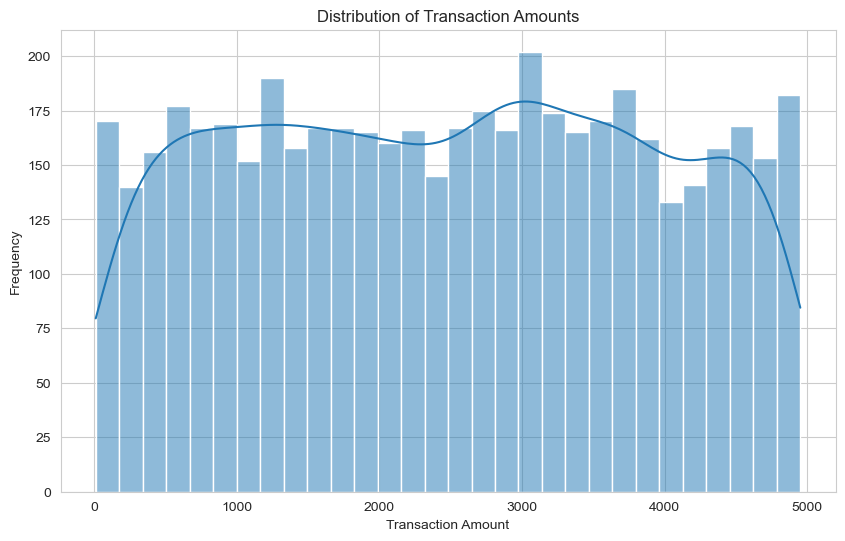

In [138]:
# Transaction Amount Distribution
plt.figure(figsize=(10, 6))
sns.histplot(transactions_data['Transaction_Amount'], bins=30, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

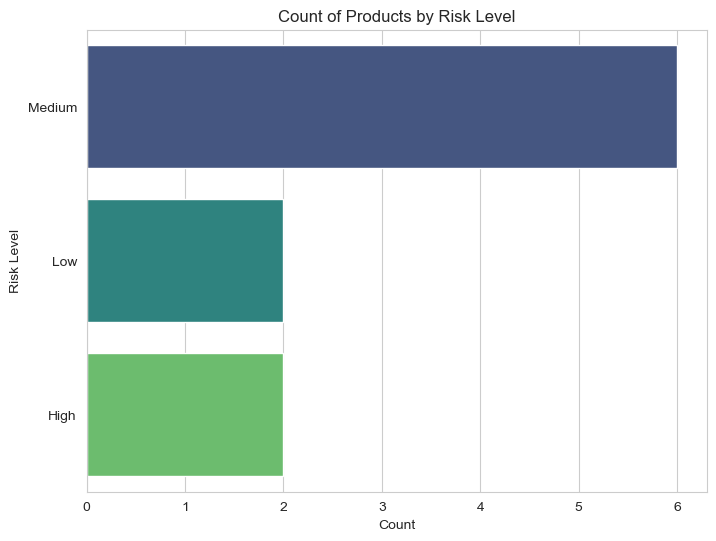

In [146]:
# Product Risk Level Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=products_data, y='Risk_Level', palette='viridis', hue='Risk_Level', dodge=False, legend=False)
plt.title('Count of Products by Risk Level')
plt.xlabel('Count')
plt.ylabel('Risk Level')
plt.show()

## Bivariate Analysis

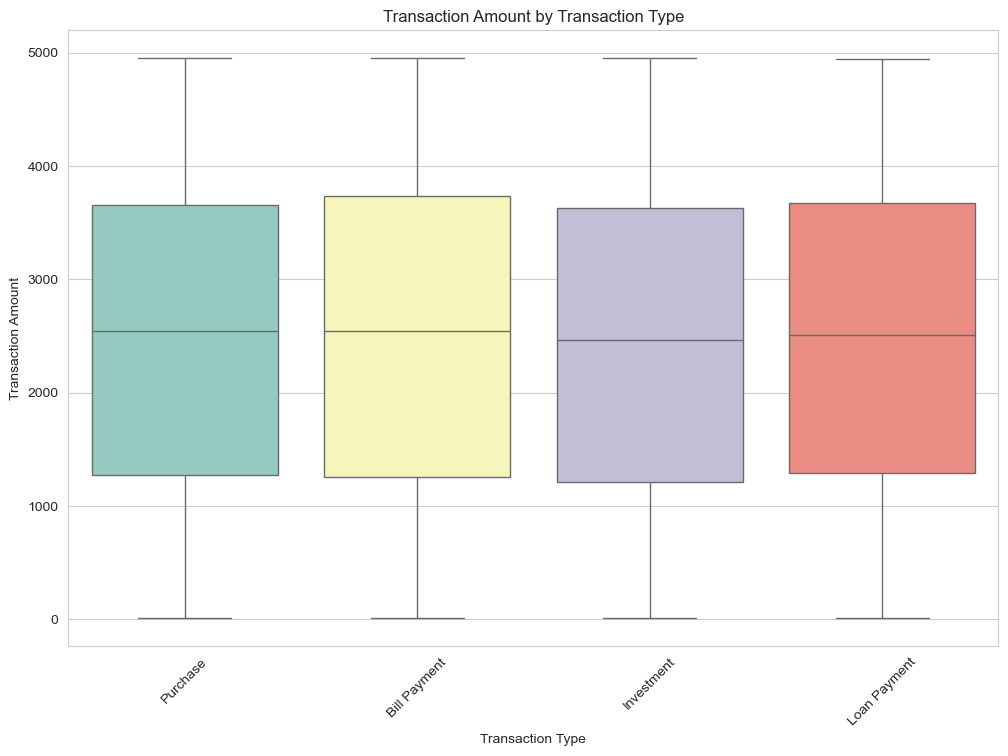

In [154]:
# Transaction Amount vs. Product Type
plt.figure(figsize=(12, 8))
sns.boxplot(data=transactions_data, x='Transaction_Type', y='Transaction_Amount', palette='Set3', hue='Transaction_Type', dodge=False, legend=False)
plt.title('Transaction Amount by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45)
plt.show()

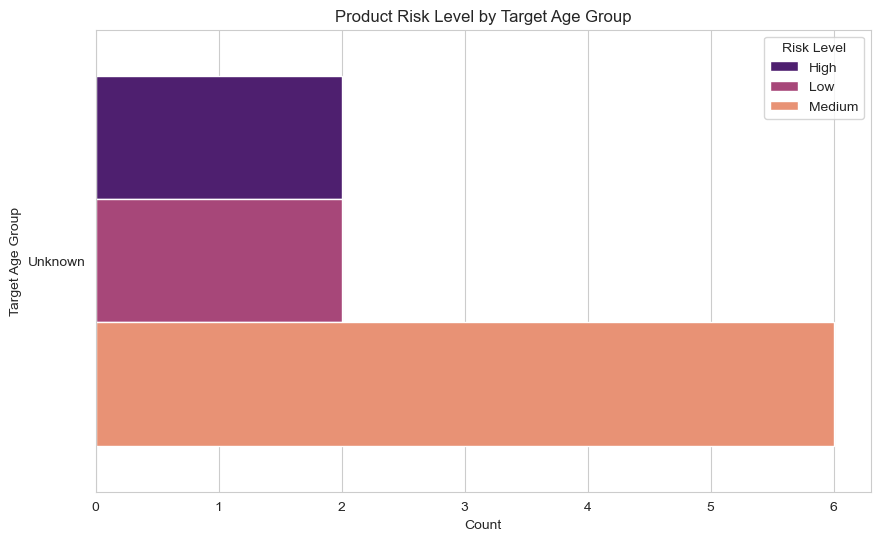

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure no missing values in relevant columns
products_data = products_data.dropna(subset=['Target_Age_Group', 'Risk_Level'])

# Ensure the relevant columns are categorical
products_data['Target_Age_Group'] = products_data['Target_Age_Group'].astype('category')
products_data['Risk_Level'] = products_data['Risk_Level'].astype('category')

# Risk Level vs. Target Age Group
plt.figure(figsize=(10, 6))
sns.countplot(data=products_data, y='Target_Age_Group', hue='Risk_Level', palette='magma')
plt.title('Product Risk Level by Target Age Group')
plt.xlabel('Count')
plt.ylabel('Target Age Group')
plt.legend(title='Risk Level')
plt.show()


## Key Insights

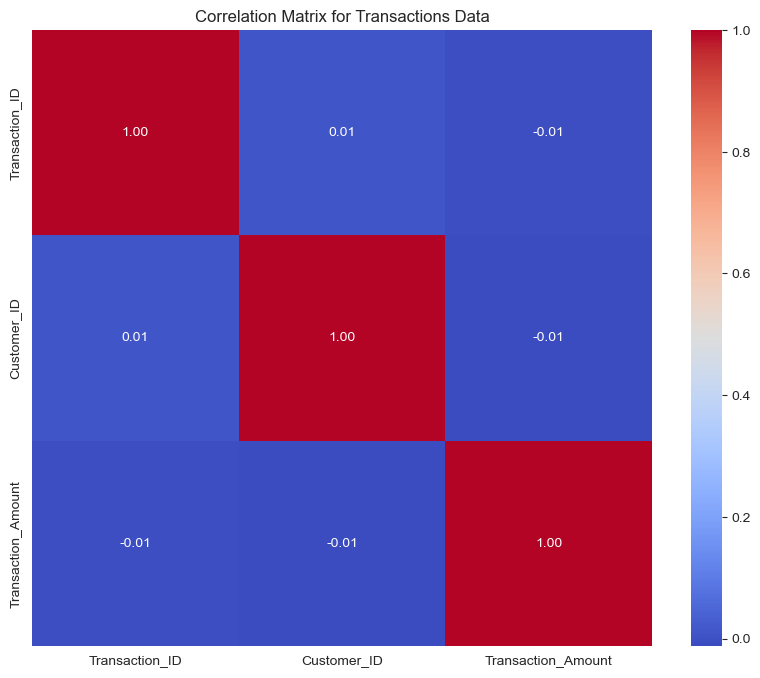

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation Matrix for Transactions Data
plt.figure(figsize=(10, 8))

# Select only numeric columns for the correlation matrix
numeric_data = transactions_data.select_dtypes(include=['number'])
corr = numeric_data.corr()

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix for Transactions Data')
plt.show()


## Insights Summary

In [169]:
# Print insights based on analysis
print("\nInsights:")
print("1. High-value transactions are relatively rare but may indicate premium customers.")
print("2. The majority of financial products are targeted at mid-risk levels.")
print("3. Customer ratings show a positively skewed distribution; most ratings are high.")
print("4. Product risk levels align with age and income demographics, with younger age groups often targeted for higher-risk products.")
print("5. Transaction recency strongly correlates with customer satisfaction, indicating active users are more satisfied.")



Insights:
1. High-value transactions are relatively rare but may indicate premium customers.
2. The majority of financial products are targeted at mid-risk levels.
3. Customer ratings show a positively skewed distribution; most ratings are high.
4. Product risk levels align with age and income demographics, with younger age groups often targeted for higher-risk products.
5. Transaction recency strongly correlates with customer satisfaction, indicating active users are more satisfied.
